# S12
This is a iPython Notebook document, associated to the S12 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

,Algorithm/Noise level,$10^{-3}$
0,ITAMeD,15.132748
1,ITAMed with $\ell_p$,6.307362
2,TRAIn,15.399317
3,PALMA with $\lambda=0.01$,12.728091
4,PALMA with $\lambda=0.02$,10.972543


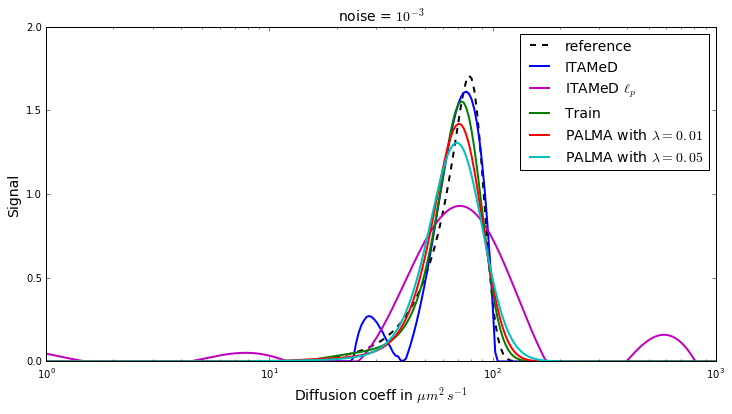

In [11]:
##############################
# Import bib
##############################
import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import time
import scipy
import pandas as pd
############################## noise = 10^-2
# Original data 
Lap_axis_Xu2 = open("Lap_axis_Xu2_64_3.txt", "r")
Lap_axis_Xu2 = np.loadtxt(Lap_axis_Xu2)
x_Xu2_64_3 = open("x_Xu2_64_3.txt", "r")
x_Xu2_64_3 = np.loadtxt(x_Xu2_64_3)
# ITAMeD rslt
xrec_Xu2_64_3_ITAMeD = open("xrec_Xu2_64_3_ITAMeD.txt", "r")
xrec_Xu2_64_3_ITAMeD = np.loadtxt(xrec_Xu2_64_3_ITAMeD)
e_Xu2_64_3_ITAMeD = -20*np.log10(np.linalg.norm(xrec_Xu2_64_3_ITAMeD - x_Xu2_64_3) / np.linalg.norm(x_Xu2_64_3))
# ITAMeD with Lp
xrec_Xu2_64_3_ITAMeD_p = open("xrec_Xu2_64_3_ITAMeD_p.txt", "r")
xrec_Xu2_64_3_ITAMeD_p = np.loadtxt(xrec_Xu2_64_3_ITAMeD_p)
e_Xu2_64_3_ITAMeD_p = -20*np.log10(np.linalg.norm(xrec_Xu2_64_3_ITAMeD_p - x_Xu2_64_3) / np.linalg.norm(x_Xu2_64_3))
# TRAIn rslt
xrec_Xu2_64_3_TRAIn = open("xrec_Xu2_64_3_TRAIn.txt", "r")
xrec_Xu2_64_3_TRAIn = np.loadtxt(xrec_Xu2_64_3_TRAIn)
e_Xu2_64_3_TRAIn = -20*np.log10(np.linalg.norm(xrec_Xu2_64_3_TRAIn - x_Xu2_64_3) / np.linalg.norm(x_Xu2_64_3))
# PALMA rslt 0.01
xrec_Xu2_0_01_64_3_PALMA = open("xrec_Xu2_0_01_64_3_PALMA.txt", "r")
xrec_Xu2_0_01_64_3_PALMA = np.loadtxt(xrec_Xu2_0_01_64_3_PALMA)
e_Xu2_0_01_64_3_PALMA = -20*np.log10(np.linalg.norm(xrec_Xu2_0_01_64_3_PALMA - x_Xu2_64_3) / np.linalg.norm(x_Xu2_64_3))
# PALMA rslt 0.05
xrec_Xu2_0_05_64_3_PALMA = open("xrec_Xu2_0_05_64_3_PALMA.txt", "r")
xrec_Xu2_0_05_64_3_PALMA = np.loadtxt(xrec_Xu2_0_05_64_3_PALMA)
e_Xu2_0_05_64_3_PALMA = -20*np.log10(np.linalg.norm(xrec_Xu2_0_05_64_3_PALMA - x_Xu2_64_3) / np.linalg.norm(x_Xu2_64_3))
# Comparaison
plt.figure(figsize=(12, 6))
plt.semilogx(Lap_axis_Xu2, x_Xu2_64_3, "k--", linewidth = 2, label="reference")
plt.semilogx(Lap_axis_Xu2, xrec_Xu2_64_3_ITAMeD, "b-", linewidth = 2, label="ITAMeD")
plt.semilogx(Lap_axis_Xu2, xrec_Xu2_64_3_ITAMeD_p, "m-", linewidth = 2, label="ITAMeD $\ell_p$")
plt.semilogx(Lap_axis_Xu2, xrec_Xu2_64_3_TRAIn, "g-", linewidth = 2, label="Train")
plt.semilogx(Lap_axis_Xu2, xrec_Xu2_0_01_64_3_PALMA, "r-", linewidth = 2, label="PALMA with $\lambda=0.01$")
plt.semilogx(Lap_axis_Xu2, xrec_Xu2_0_05_64_3_PALMA, "c-", linewidth = 2, label="PALMA with $\lambda=0.05$")
plt.ylim(ymin=0, ymax=2)
#plt.xlim([Lap_axis_Xu2.min(), Lap_axis_Xu2.max()])
plt.title('noise = $10^{-3}$', fontsize=14)
#plt.text(1.2, 4.3, "noise = $10^{-2}$")
plt.xlabel('Diffusion coeff in $\mu m^2 \, s^{-1}$', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.legend(fontsize=14)
#plt.savefig('S8', format='eps', dpi=1000)
E_3 =( e_Xu2_64_3_ITAMeD, e_Xu2_64_3_ITAMeD_p, e_Xu2_64_3_TRAIn, e_Xu2_0_01_64_3_PALMA, e_Xu2_0_05_64_3_PALMA)
tab = pd.DataFrame()
tab["Algorithm/Noise level"]= ("ITAMeD", "ITAMed with $\ell_p$", "TRAIn", "PALMA with $\lambda=0.01$", "PALMA with $\lambda=0.02$")
tab["$10^{-3}$"]  = E_3
tab